In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss


In [21]:
#simulate data
np.random.seed(42)

X = np.random.randn(500, 2)
y = (np.random.rand(500) < 0.05).astype(int)  # 5% positives

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [23]:
#train model
model = LogisticRegression()
model.fit(X_train, y_train)
#predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]


In [25]:
#brier score
brier = brier_score_loss(y_test, y_probs)
print("Brier Score:", brier)


Brier Score: 0.01741001173853478


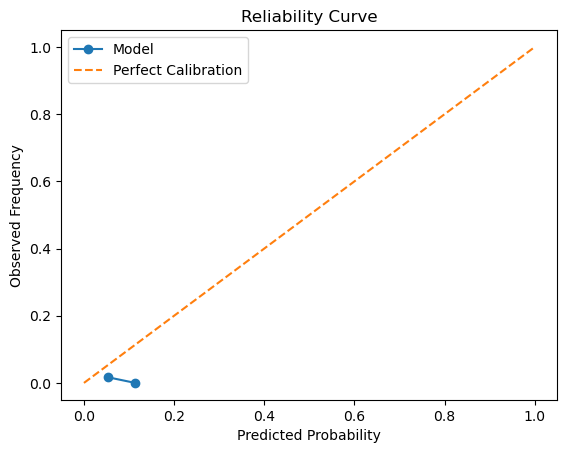

In [27]:
#reliability curve
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label="Model")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfect Calibration")

plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Reliability Curve")
plt.legend()
plt.show()


# Probability Calibration & Reliability

## Objective
This notebook evaluates the quality of predicted probabilities from a Logistic Regression classifier using calibration metrics and reliability curves.

---

## Key Concepts

**Calibration**  
Measures how well predicted probabilities reflect true outcome frequencies.

**Well-calibrated model**  
Predicted probability of 0.7 → Event occurs ~70% of the time.

---

## Evaluation Tools

**Brier Score**  
Measures mean squared error of probabilistic predictions. Lower values indicate better calibration.

**Reliability Curve**  
Plots predicted probabilities against observed frequencies.

---

## Key Insight
A model may achieve strong classification accuracy or AUC while producing poorly calibrated probabilities. Calibration analysis is essential when probability estimates inform decision-making.
